#### 0. Import basic methods from source.py
Import useful methods from source.py (NB: can later be integrated into a package)

In [1]:
from source import *

#### 1. Open xls file and ingest Inputs table
Note I am assuming that all inputs will be aggregated into one single inputs table

In [2]:
filename = r'Input data python file.xlsx'

In [3]:
# load workbook
wb = load_workbook(filename)

In [4]:
# load worksheet
ws = wb["Python test sheet"]

In [5]:
mapping = {}

for entry, data_boundary in ws.tables.items():
    # parse the data within the ref boundary
    data = ws[data_boundary]
    # extract the data 
    # the inner list comprehension gets the values for each cell in the table
    content = [[cell.value for cell in ent] 
               for ent in data
          ]
    
    # find header
    header = content[0]
    
    # find the rest ... the contents, excluding the header
    rest = content[1:]
    
    # create dataframe with the column names
    # and pair table name with dataframe
    df = pd.DataFrame(rest, columns = header)
    mapping[entry] = df

In [6]:
Inputs = pd.DataFrame(mapping['Inputs'])
Inputs.head()

,Category,Sub-system,Element,Component,Description,Number,Unit
0,Capex,Wind energy source & Transport,Offshore wind park,Foundations,Jacket or monopile costs (Development and Proj...,100000.0,USD per unit
1,Capex,Wind energy source & Transport,Offshore wind park,Foundations,Jacket or monopile costs (Procurement),400000.0,USD per unit
2,Capex,Wind energy source & Transport,Offshore wind park,Foundations,Jacket or monopile costs (Installation and Com...,300000.0,USD per unit
3,Capex,Wind energy source & Transport,Offshore wind park,Foundations,Corrosion protection costs (Development and Pr...,50000.0,USD per unit
4,Capex,Wind energy source & Transport,Offshore wind park,Foundations,Corrosion protection costs (Procurement),90000.0,USD per unit


#### 2. Select one item from the Inputs table (generate cashflow overview)
* Sub-system
* Element
* Component
* Description
* Number
* Unit

CPU times: total: 0 ns
Wall time: 0 ns


'Construction items Foundations: 1 units'

'CAPEX component Foundations: 1530000.0 eu for 1 unit(s)'

'Construction duration Foundations: 3 years'

'Construction allocation Foundations: [0.4, 0.3, 0.3] per year'

'Economic Lifetime Foundations: 50 years'

'Depreciation Flag Foundations: 1.0'

'Yearly Variable Costs Flag Foundations: 1.0'

'Yearly Variable Costs Rate Foundations: 0.03'

'Insurance Flag Foundations: 1.0'

'Insurance Rate Foundations: 0.005'

'Decommissioning Foundations: 0.02'

'Residual Value Foundations: 0.01'

'OPEX component Foundations: 53549.99999999999 eu for 1 unit(s)'

'Revenue Foundations: 0 euro/unit'

c:\Users\MRV\OneDrive - Van Oord\Software\github\OpenSCSim\source.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['revenue'].loc[year] = revenue['values'][revenue['years'] == year]
c:\Users\MRV\OneDrive - Van Oord\Software\github\OpenSCSim\source.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['npv'].loc[year] = df['cashflow'].loc[year] * (1 + interest) ** (-1 * (year - baseyear))


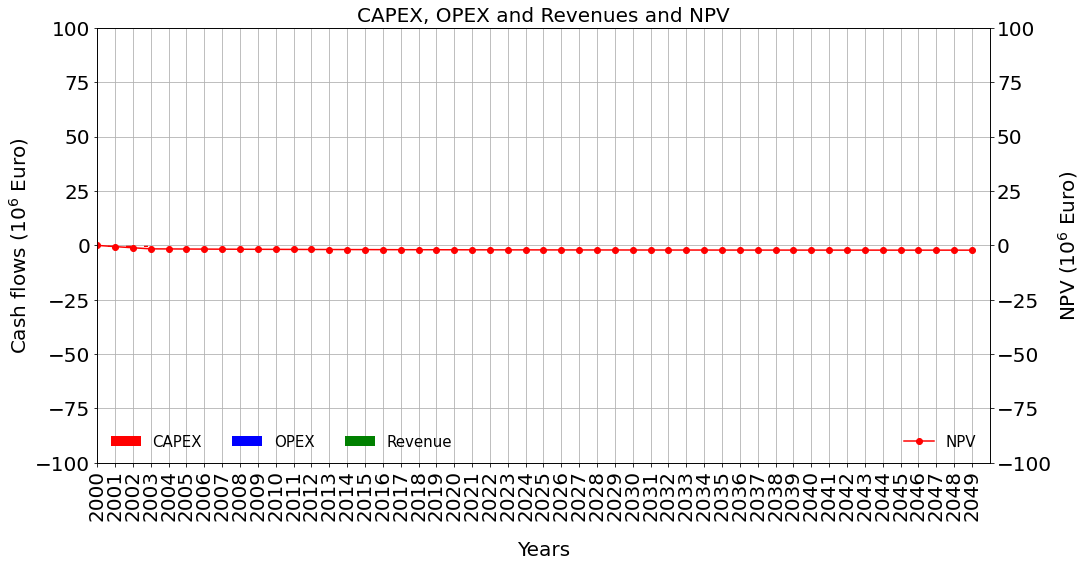

In [9]:
%time
df_Foundations = Inputs_2_cashflow(Inputs, 
                                   startyear=2000,
                                   lifecycle=11,
                                   subsystem='Wind energy source & Transport',
                                   element='Offshore wind park',
                                   component='Foundations',
                                   Debug=True)
df_npv_Foundations = calculate_npv(df_Foundations)
create_npv_plot(df_npv_Foundations, cash_flow_lims=[-100,100], npv_lims=[-100,100])

CPU times: total: 0 ns
Wall time: 0 ns


'Construction items Turbines: 1 units'

'CAPEX component Turbines: 34500000.0 eu for 1 unit(s)'

'Construction duration Turbines: 3 years'

'Construction allocation Turbines: [0.4, 0.3, 0.3] per year'

'Economic Lifetime Turbines: 50 years'

'Depreciation Flag Turbines: 1.0'

'Yearly Variable Costs Flag Turbines: 1.0'

'Yearly Variable Costs Rate Turbines: 0.03'

'Insurance Flag Turbines: 1.0'

'Insurance Rate Turbines: 0.005'

'Decommissioning Turbines: 0.02'

'Residual Value Turbines: 0.01'

'OPEX component Turbines: 1207499.9999999998 eu for 1 unit(s)'

'Revenue Turbines: 0 euro/unit'

c:\Users\MRV\OneDrive - Van Oord\Software\github\OpenSCSim\source.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['revenue'].loc[year] = revenue['values'][revenue['years'] == year]
c:\Users\MRV\OneDrive - Van Oord\Software\github\OpenSCSim\source.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['npv'].loc[year] = df['cashflow'].loc[year] * (1 + interest) ** (-1 * (year - baseyear))


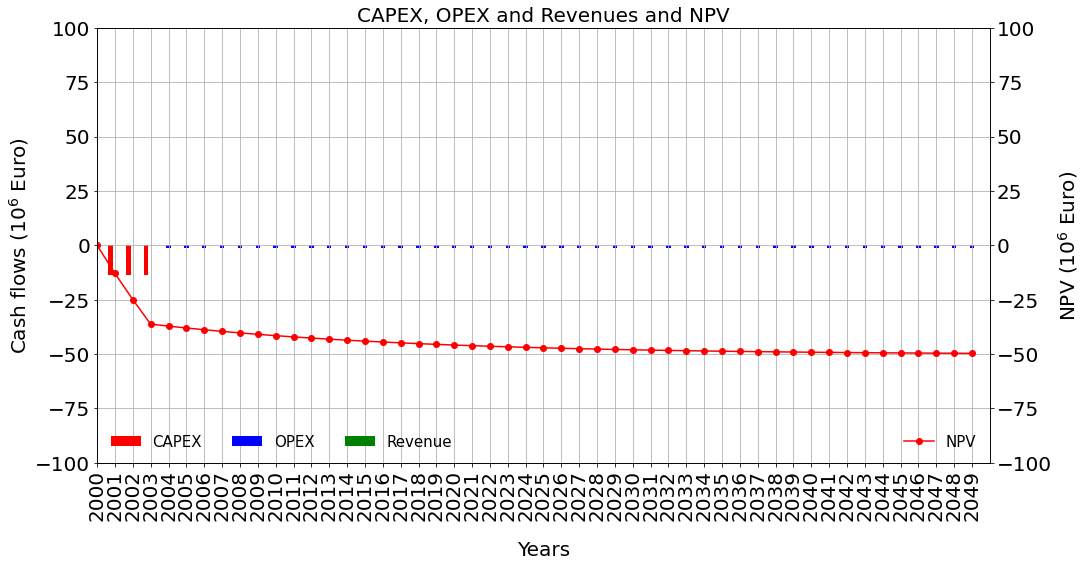

In [10]:
%time
df_Turbines = Inputs_2_cashflow(Inputs, 
                                   startyear=2000,
                                   lifecycle=11,
                                   subsystem='Wind energy source & Transport',
                                   element='Offshore wind park',
                                   component='Turbines',
                                   Debug=True)
df_npv_Turbines = calculate_npv(df_Turbines)
create_npv_plot(df_npv_Turbines, cash_flow_lims=[-100,100], npv_lims=[-100,100])

##### A. do per item

In [7]:
df_Foundations = Inputs_2_cashflow(Inputs, startyear=2022, lifecycle=11, component='Foundations',Debug=True)
df_npv_Foundations = calculate_npv(df_Foundations)
create_npv_plot(df_npv_Foundations, cash_flow_lims=[-100,100], npv_lims=[-100,100])

ValueError: can only convert an array of size 1 to a Python scalar

In [ ]:
df_Turbines = Inputs_2_cashflow(Inputs, startyear=2028, lifecycle=11, component='Turbines',Debug=True)
df_npv_Turbines = calculate_npv(df_Turbines)
create_npv_plot(df_Turbines, cash_flow_lims=[-500,500], npv_lims=[-500,500])

##### B. combine two items

In [ ]:
df_Foundations = Inputs_2_cashflow(Inputs, startyear=2022, lifecycle=11, component='Foundations',Debug=False)
df_Turbines = Inputs_2_cashflow(Inputs, startyear=2028, lifecycle=11, component='Turbines',Debug=False)
df_combined = combine_cashflow_dataframes([df_Foundations, df_Turbines])

In [ ]:
df_npv_combined = calculate_npv(df_combined)

In [ ]:
create_npv_plot(df_npv_combined, cash_flow_lims=[-500,500], npv_lims=[-500,500])